<a href="https://colab.research.google.com/github/mohansameer1983/Plant-Seedlings-Image-Classification-CNN/blob/main/Plant_Seedlings_Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Github Project - 
https://github.com/mohansameer1983/Plant-Seedlings-Image-Classification-CNN

In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [ ]:
# Import necessary libraries

import numpy as np    
import pandas as pd

import cv2
from google.colab.patches import cv2_imshow      # To show images using cv2 module
from tensorflow.keras.utils import to_categorical

from skimage import data, io                     # Import skimage library (data - Test images and example data.
from sklearn.model_selection import train_test_split
import seaborn as sns                                                 #                          io - Reading, saving, and displaying images.) 
import matplotlib.pyplot as plt
%matplotlib inline                 

import os                                        # This module provides a portable way of using operating system dependent functionality.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

## Loading Image Dataset and Label Data

In [ ]:
# Mount Google drive so dataset can be accessed
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load image data
file_path = '/content/drive/My Drive/Colab Notebooks/data/images.npy'

Xraw_images = np.load(file_path)

In [ ]:
# Load labels
y = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/Labels.csv')

In [ ]:
# Shape of image and Label dataset
print('Image Array Shape - ', Xraw_images.shape)
print('Label DF Shape - ', y.shape)

Image Array Shape -  (4750, 128, 128, 3)
Label DF Shape -  (4750, 1)


In [ ]:
# Distribution of labels
y.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

In [ ]:
# Count number of classes
y.nunique()

Label    12
dtype: int64

## Visualize Images

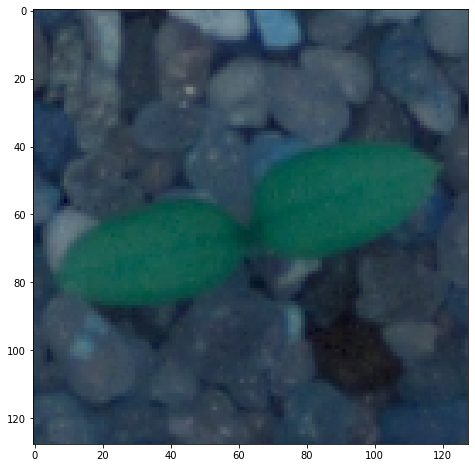

In [ ]:
i=2000
plt.figure(figsize = (8,8))    
plt.imshow(Xraw_images[i], cmap='gray');

In [ ]:
# Image Shape
H, W = Xraw_images[i].shape[:2]
# Displaying the height and width 
print("Height = {},  Width = {}".format(H, W)) 

Height = 128,  Width = 128


In [ ]:
print('Image Matrix: \n',  Xraw_images[i])
print(type(Xraw_images[i]))

Image Matrix: 
 [[[ 44  64  88]
  [ 43  65  88]
  [ 41  66  88]
  ...
  [ 76  97 112]
  [ 75  96 111]
  [ 75  96 110]]

 [[ 45  61  87]
  [ 42  63  89]
  [ 36  60  85]
  ...
  [ 75  96 110]
  [ 75  95 109]
  [ 75  95 108]]

 [[ 44  58  82]
  [ 40  58  84]
  [ 37  59  84]
  ...
  [ 78  97 111]
  [ 74  94 108]
  [ 76  95 108]]

 ...

 [[ 38  58  79]
  [ 39  59  80]
  [ 42  63  82]
  ...
  [ 38  61  86]
  [ 40  64  84]
  [ 38  62  82]]

 [[ 37  57  77]
  [ 43  64  82]
  [ 47  68  85]
  ...
  [ 37  59  81]
  [ 40  64  80]
  [ 38  63  78]]

 [[ 43  63  81]
  [ 45  67  84]
  [ 46  69  85]
  ...
  [ 39  60  79]
  [ 43  67  80]
  [ 45  69  80]]]
<class 'numpy.ndarray'>


# Data Pre-Processing

## Grayscaling Images

In [ ]:
# Convert image to grayscale. The second argument in the following step is cv2.COLOR_BGR2GRAY, which converts colour image to grayscale.

images_gray = np.zeros(Xraw_images.shape[:-1], dtype=Xraw_images.dtype)
for i, img in enumerate(Xraw_images):
    images_gray[i] = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

images_gray = images_gray.reshape(images_gray.shape[0], 128, 128, 1)
# Shape of gray image dataset
print('Image Array Shape - ', images_gray.shape)

Image Array Shape -  (4750, 128, 128, 1)


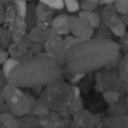

In [ ]:
# Visualize image after grayscaling
cv2_imshow(images_gray[2000])

## Normalization

In [ ]:
# Normalize the data
images_normalize = images_gray.astype('float32') / 255.0
print('Normalize Image Array Shape - ', images_normalize.shape)

Normalize Image Array Shape -  (4750, 128, 128, 1)


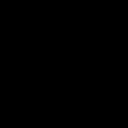

In [ ]:
# Visualize image after normalization
cv2_imshow(images_normalize[2000])

## Gaussian Blurring

In [ ]:
# Apply Gaussian blurring to all images
images_blur = np.zeros(images_normalize.shape[:-1], dtype=images_normalize.dtype)
for i, img in enumerate(images_normalize):
    images_blur[i] = cv2.GaussianBlur(img, (5, 5), 0)

images_blur = images_blur.reshape(images_blur.shape[0], 128, 128, 1)
# Shape of blur image dataset
print('Image Array Shape - ', images_blur.shape)

Image Array Shape -  (4750, 128, 128, 1)


Let's visualize some images

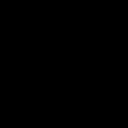

In [ ]:
# Visualize image after normalization and blurring
cv2_imshow(images_blur[i])

In [ ]:
print('Image Matrix: \n',  images_blur[i])
print(type(images_blur[i]))

Image Matrix: 
 [[[0.25042892]
  [0.2572304 ]
  [0.28982845]
  ...
  [0.34454662]
  [0.3590686 ]
  [0.36740196]]

 [[0.271201  ]
  [0.28192404]
  [0.31311277]
  ...
  [0.33342528]
  [0.34025735]
  [0.34635416]]

 [[0.32984072]
  [0.34617037]
  [0.36564034]
  ...
  [0.30269608]
  [0.29080883]
  [0.2906863 ]]

 ...

 [[0.28354782]
  [0.28333333]
  [0.2794118 ]
  ...
  [0.27392772]
  [0.26182598]
  [0.2605086 ]]

 [[0.30183828]
  [0.30079657]
  [0.2933977 ]
  ...
  [0.29131436]
  [0.29592526]
  [0.30217525]]

 [[0.31194854]
  [0.31038606]
  [0.30214465]
  ...
  [0.30370712]
  [0.3156863 ]
  [0.3247549 ]]]
<class 'numpy.ndarray'>


**Note -** When we used blurred images, accuracy result was totally bad. So, we discarded this step, and instead will work on normalized images array only.

## One-Hot Encode Label Vector

In [ ]:
#One-Hot Encoding using sci-kit learn to convert strings into Integer
from sklearn.preprocessing import LabelEncoder
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)

# Convert integer encoded labels to Keras supported one-hot encode vector
y_encoded = to_categorical(integer_encoded, num_classes=12)

print("Shape of y_encoded:", y_encoded.shape)
print("One value of y_encoded:", y_encoded[0])

Shape of y_encoded: (4750, 12)
One value of y_encoded: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## Split Data

In [ ]:
# Split data into test and train to build the model. 70% is train data
X_train, X_test, y_train, y_test = train_test_split(images_normalize, y_encoded, test_size=0.3, random_state=0)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

### Print shape of the data

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

print(y_train[0])

(3325, 128, 128, 1)
(3325, 12)
(712, 128, 128, 1)
(712, 12)
(713, 128, 128, 1)
(713, 12)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Check train, validation and test sets, if in compatible shapes
We can see from above shape details, that all three are already compatible.

### Initialize a sequential model 

In [ ]:
from tensorflow.keras.models import Sequential          # Sequential groups a linear stack of layers into a tf.keras.Model.
from tensorflow.keras.layers import Conv2D              # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D        # Max pooling operation for 2D spatial data.
from tensorflow.keras.layers import Flatten             # Flattens the input. Does not affect the batch size.
from tensorflow.keras.layers import Dense, Dropout      # Dropout: Applies Dropout to the input.
                                                        # Dense: Just your regular densely-connected NN layer.
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(128, 128, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(12, activation="softmax"))

### Compile and fit the model

In [ ]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
model.fit( x=X_train, y=y_train, batch_size=35, epochs=10, validation_split = 0.3)

Epoch 1/20
67/67 [==============================] - 4s 46ms/step - loss: 4.2095 - accuracy: 0.1354 - val_loss: 2.4401 - val_accuracy: 0.1423
Epoch 2/20
67/67 [==============================] - 3s 43ms/step - loss: 2.4319 - accuracy: 0.1321 - val_loss: 2.3965 - val_accuracy: 0.1653
Epoch 3/20
67/67 [==============================] - 3s 43ms/step - loss: 2.1046 - accuracy: 0.3205 - val_loss: 2.3927 - val_accuracy: 0.2074
Epoch 4/20
67/67 [==============================] - 3s 43ms/step - loss: 1.1327 - accuracy: 0.6849 - val_loss: 2.7001 - val_accuracy: 0.2174
Epoch 5/20
67/67 [==============================] - 3s 43ms/step - loss: 0.4713 - accuracy: 0.8936 - val_loss: 3.1911 - val_accuracy: 0.1984
Epoch 6/20
67/67 [==============================] - 3s 44ms/step - loss: 0.1344 - accuracy: 0.9846 - val_loss: 3.8928 - val_accuracy: 0.1814
Epoch 7/20
67/67 [==============================] - 3s 44ms/step - loss: 0.0350 - accuracy: 0.9986 - val_loss: 4.8406 - val_accuracy: 0.1623
Epoch 8/20
67

### Final loss and accuracy on validation dataset

In [ ]:
model.evaluate(X_val, y_val)

23/23 [==============================] - 0s 10ms/step - loss: 6.0980 - accuracy: 0.1823


[6.097984790802002, 0.18232819437980652]

In [ ]:
# Predicting test data. To generate confusion matrix, need to convert both predictions and test labels as single digit, and not as vectors
rounded_pred = model.predict_classes(X_test)

rounded_test_labels = np.argmax(y_test, axis=1)

In [ ]:
rounded_pred

array([11,  3, 11,  6,  3,  3,  3,  3,  6,  6,  6,  3,  3,  6,  3,  6,  3,
        3, 11,  3,  6,  3,  6,  3,  3,  6,  3,  3,  6,  3,  6,  3,  6,  3,
        3,  6,  3,  6, 11,  3,  3,  6,  3,  6,  6,  6,  3,  3,  3,  3, 11,
        3,  6,  3,  6,  3,  3,  3,  3,  6,  3,  3,  3,  6,  8,  6,  6,  3,
        3,  6,  3, 11,  6,  6,  6,  6,  3,  6,  3,  6,  3,  6,  6,  3,  6,
       11,  6,  3,  3,  3,  6, 11,  6,  6,  3,  6,  3,  6,  6,  6,  3,  6,
        3,  6,  3,  3,  6,  3,  3,  6,  6,  3,  3,  3,  6,  3,  0,  3,  3,
        3,  6, 11,  3,  3, 11,  3,  3,  6,  3,  6,  6,  6,  3,  3,  6,  6,
        6,  3,  3,  3,  6,  3,  6,  3,  6,  3,  6,  6,  3,  6,  3,  3,  6,
        8,  3,  3,  0,  3,  6,  8,  3,  6,  6,  3,  6,  3,  6,  6,  3,  3,
        6,  6,  6,  3,  3,  3,  6,  3,  3,  6,  8,  6,  3,  3,  3,  0,  6,
        6,  3,  3,  6,  3,  3, 11,  3,  6,  6,  3,  6,  6,  3,  0,  6,  6,
        3,  6,  3,  6,  3,  6,  6,  6,  6,  3,  6,  3,  6,  3,  3,  6,  3,
        3,  6,  3,  3,  3

### Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("=== Confusion Matrix ===")
cm = confusion_matrix(rounded_test_labels, rounded_pred)
print(cm)

=== Confusion Matrix ===
[[ 7  0  0 10  0  0 17  0  0  0  1  2]
 [ 0  0  0 20  0  0 26  0  0  0  1  3]
 [ 0  0  0 28  0  0 18  0  2  0  1  2]
 [ 0  0  0 68  0  0 23  0  2  0  1  1]
 [ 0  0  0 18  0  0 15  0  1  0  0  1]
 [ 2  0  0 44  0  0 35  0  1  0  0  3]
 [ 1  0  0 54  0  0 39  0  1  0  0  1]
 [ 2  0  0 12  0  0 11  0  0  0  0  1]
 [ 1  0  0 56  0  0 16  0  1  0  0  3]
 [ 0  0  1 27  0  0 10  0  1  0  0  1]
 [ 1  0  0 20  0  0 29  0  2  0  4  4]
 [ 3  0  0 11  0  0 39  0  1  0  0  6]]


### Final loss and accuracy

In [ ]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 10ms/step - loss: 2.3267 - accuracy: 0.1756


[2.326678991317749, 0.1755618005990982]

# Let's visualize prediction results

Predicted label: 11
Softmax Outputs: [[0.03347699 0.12757647 0.01923283 0.04075938 0.06381783 0.10019688
  0.07126904 0.08446498 0.206842   0.01386965 0.02567601 0.21281795]]
1.0


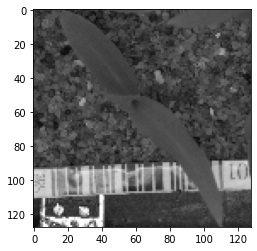

In [ ]:
# Predict X_test[2]
plt.imshow(X_test[2].reshape(128, 128), cmap='gray')
y_pred = model.predict(X_test[2].reshape(1, 128, 128, 1))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 6


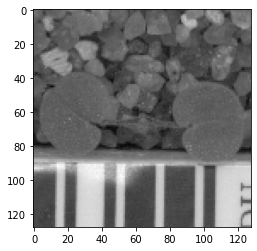

In [ ]:
# Predict X_test[3]
plt.imshow(X_test[3].reshape(128, 128), cmap='gray')
y_pred = model.predict(X_test[3].reshape(1, 128, 128, 1))
print("Predicted label:", y_pred.argmax())

Predicted label: 3


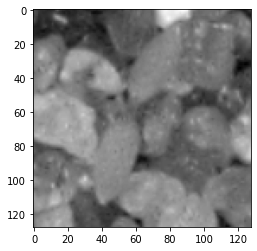

In [ ]:
# Predict X_test[33]
plt.imshow(X_test[33].reshape(128, 128), cmap='gray')
y_pred = model.predict(X_test[33].reshape(1, 128, 128, 1))
print("Predicted label:", y_pred.argmax())

Predicted label: 3


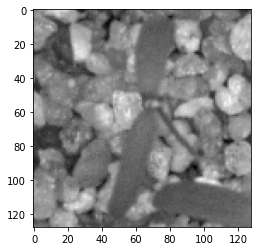

In [ ]:
# Predict X_test[36]
plt.imshow(X_test[36].reshape(128, 128), cmap='gray')
y_pred = model.predict(X_test[36].reshape(1, 128, 128, 1))
print("Predicted label:", y_pred.argmax())

Predicted label: 6


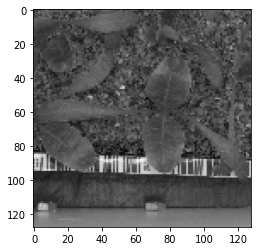

In [ ]:
# Predict X_test[59]
plt.imshow(X_test[59].reshape(128, 128), cmap='gray')
y_pred = model.predict(X_test[59].reshape(1, 128, 128, 1))
print("Predicted label:", y_pred.argmax())